In [1]:
print("Hello")


Hello


In [27]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv("train.csv",header=None)


In [28]:
# df = pd.DataFrame(data)

numarrayxy = np.array(data.values)
xyshape = numarrayxy.shape

x = np.array(numarrayxy[:,:(xyshape[1]-1)])

xshape = x.shape
# print(xshape)
onex = np.ones((xshape[0],1))
y = np.array(numarrayxy[:,xyshape[1]-1])

x = np.hstack((onex,x))
#added extra column to x 
# xshape = x.shape
# print(xshape)


In [33]:
w = np.linalg.pinv(x).dot(y)
ycalc = x.dot(w)
trainerror = np.sum((ycalc - y)**2)
trainerror = trainerror/(np.sum(y**2))

print(trainerror)



0.6080463224138236


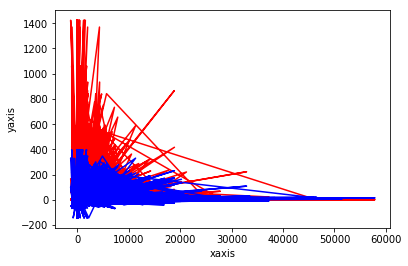

In [32]:
# plt.xlabel("xaxis")
# plt.ylabel("yaxis")
# plt.plot(x,y,'r')
# plt.plot(x,ycalc,'b')
# plt.show()
